In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/all_features.csv")

In [3]:
df = df.drop(columns = ["SOFR","SOFRVOL","EFFRVOL","OBFR","OBFRVOL"])

In [4]:
df = df.set_index("date")

In [5]:
df = df.dropna()

In [6]:
df = (df-df.mean())/df.std()

## Correlation

In [7]:
cor = df.corr()["SP500_NORM"].sort_values(ascending = False)

In [8]:
cor.to_csv("datasets/correlation.csv")

<AxesSubplot:ylabel='SP500_NORM'>

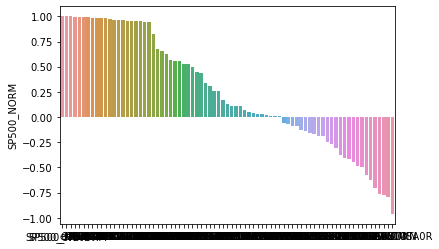

In [9]:
sns.barplot(x = cor.index, y = cor)

## Change Rate Correlation

In [10]:
df = df.drop(columns = "SP500_UNNORM")

In [11]:
diffs = df.diff().replace(0, method = "bfill")
dcor = diffs.corr()["SP500_NORM"].sort_values(ascending = False)

In [12]:
dcor.to_csv("datasets/diff_correlation.csv")

<AxesSubplot:ylabel='SP500_NORM'>

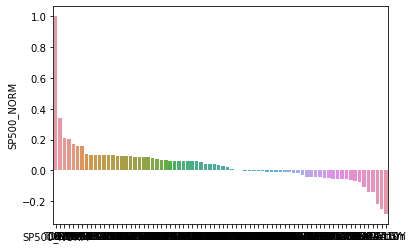

In [13]:
sns.barplot(x = dcor.index, y = dcor)

In [14]:
dcor.head()

SP500_NORM    1.000000
T10YIE        0.339859
DFII30        0.208697
DLTIIT        0.204237
DFII20        0.172076
Name: SP500_NORM, dtype: float64

In [15]:
dcor.tail()

ema        -0.139390
DEXCHUS    -0.141229
momentum   -0.214672
AAA10Y     -0.253384
BAA10Y     -0.282715
Name: SP500_NORM, dtype: float64

In [16]:
cor.head()

SP500_NORM      1.000000
SP500_UNNORM    1.000000
ema             0.999180
ma7             0.998093
12ema           0.997672
Name: SP500_NORM, dtype: float64

In [17]:
cor.tail()

AAA10Y         -0.705303
PCUOMINOMIN    -0.764089
DEXUSUK        -0.775465
ASEANTOT       -0.793697
CUUR0000SA0R   -0.962791
Name: SP500_NORM, dtype: float64

## Time Lagged Cross Correlation

In [18]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [19]:
lags = [1,5,20,250]
tlcc = pd.DataFrame(index = lags, columns = df.columns)
for l in lags:
    for c in df.columns:
        tlcc[c][l] = crosscorr(df[c].copy(),df["SP500_NORM"].copy(),l)
tlcc = tlcc.astype("float")

<AxesSubplot:>

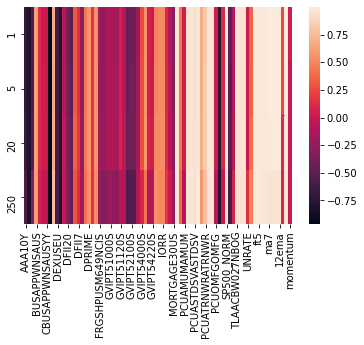

In [20]:
sns.heatmap(tlcc)

## Change Rate Time Lagged Cross Correlation

In [21]:
lags = [1,5,20,250]
dtlcc = pd.DataFrame(index = lags, columns = diffs.columns)
for l in lags:
    for c in diffs.columns:
        dtlcc[c][l] = crosscorr(diffs[c].copy(),diffs["SP500_NORM"].copy(),l)
dtlcc = dtlcc.astype("float")

In [22]:
dtlcc.to_csv()

',AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,DEXUSUK,DFII10,DFII20,DFII30,DFII5,DFII7,DLTIIT,DPCREDIT,DPRIME,EECTOT,EFFR,FRGSHPUSM649NCIS,GVIPT50002S,GVIPT50030S,GVIPT51000S,GVIPT51100S,GVIPT51110S,GVIPT51120S,GVIPT51200S,GVIPT52000S,GVIPT52100S,GVIPT521A3S,GVIPT52300S,GVIPT54000S,GVIPT54100S,GVIPT54200S,GVIPT54220S,INFECTDISEMVTRACKD,IOER,IORR,MEDCPIM158SFRBCLE,MORTGAGE15US,MORTGAGE30US,PCUADLVWRADLVWR,PCUAINFOAINFO,PCUAMUMAMUM,PCUARETTRARETTR,PCUASHCASHC,PCUASTDSVASTDSV,PCUATRADEATRADE,PCUATRANSATRANS,PCUATRNWRATRNWR,PCUATTDSVATTDSV,PCUAWHLTRAWHLTR,PCUOMFGOMFG,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500_NORM,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD,ft3,ft5,ft10,ft100,ma7,ma21,26ema,12ema,MACD,ema,momentum\r\n1,-0.08757081926127386,0.031185032022008657,-0.18271799299405575,0.0006656682911031239,0.013530348633796367,-0.006202856240313181,0.011600609030724096,-0.036565077584092484,-0.07696807275136

<AxesSubplot:>

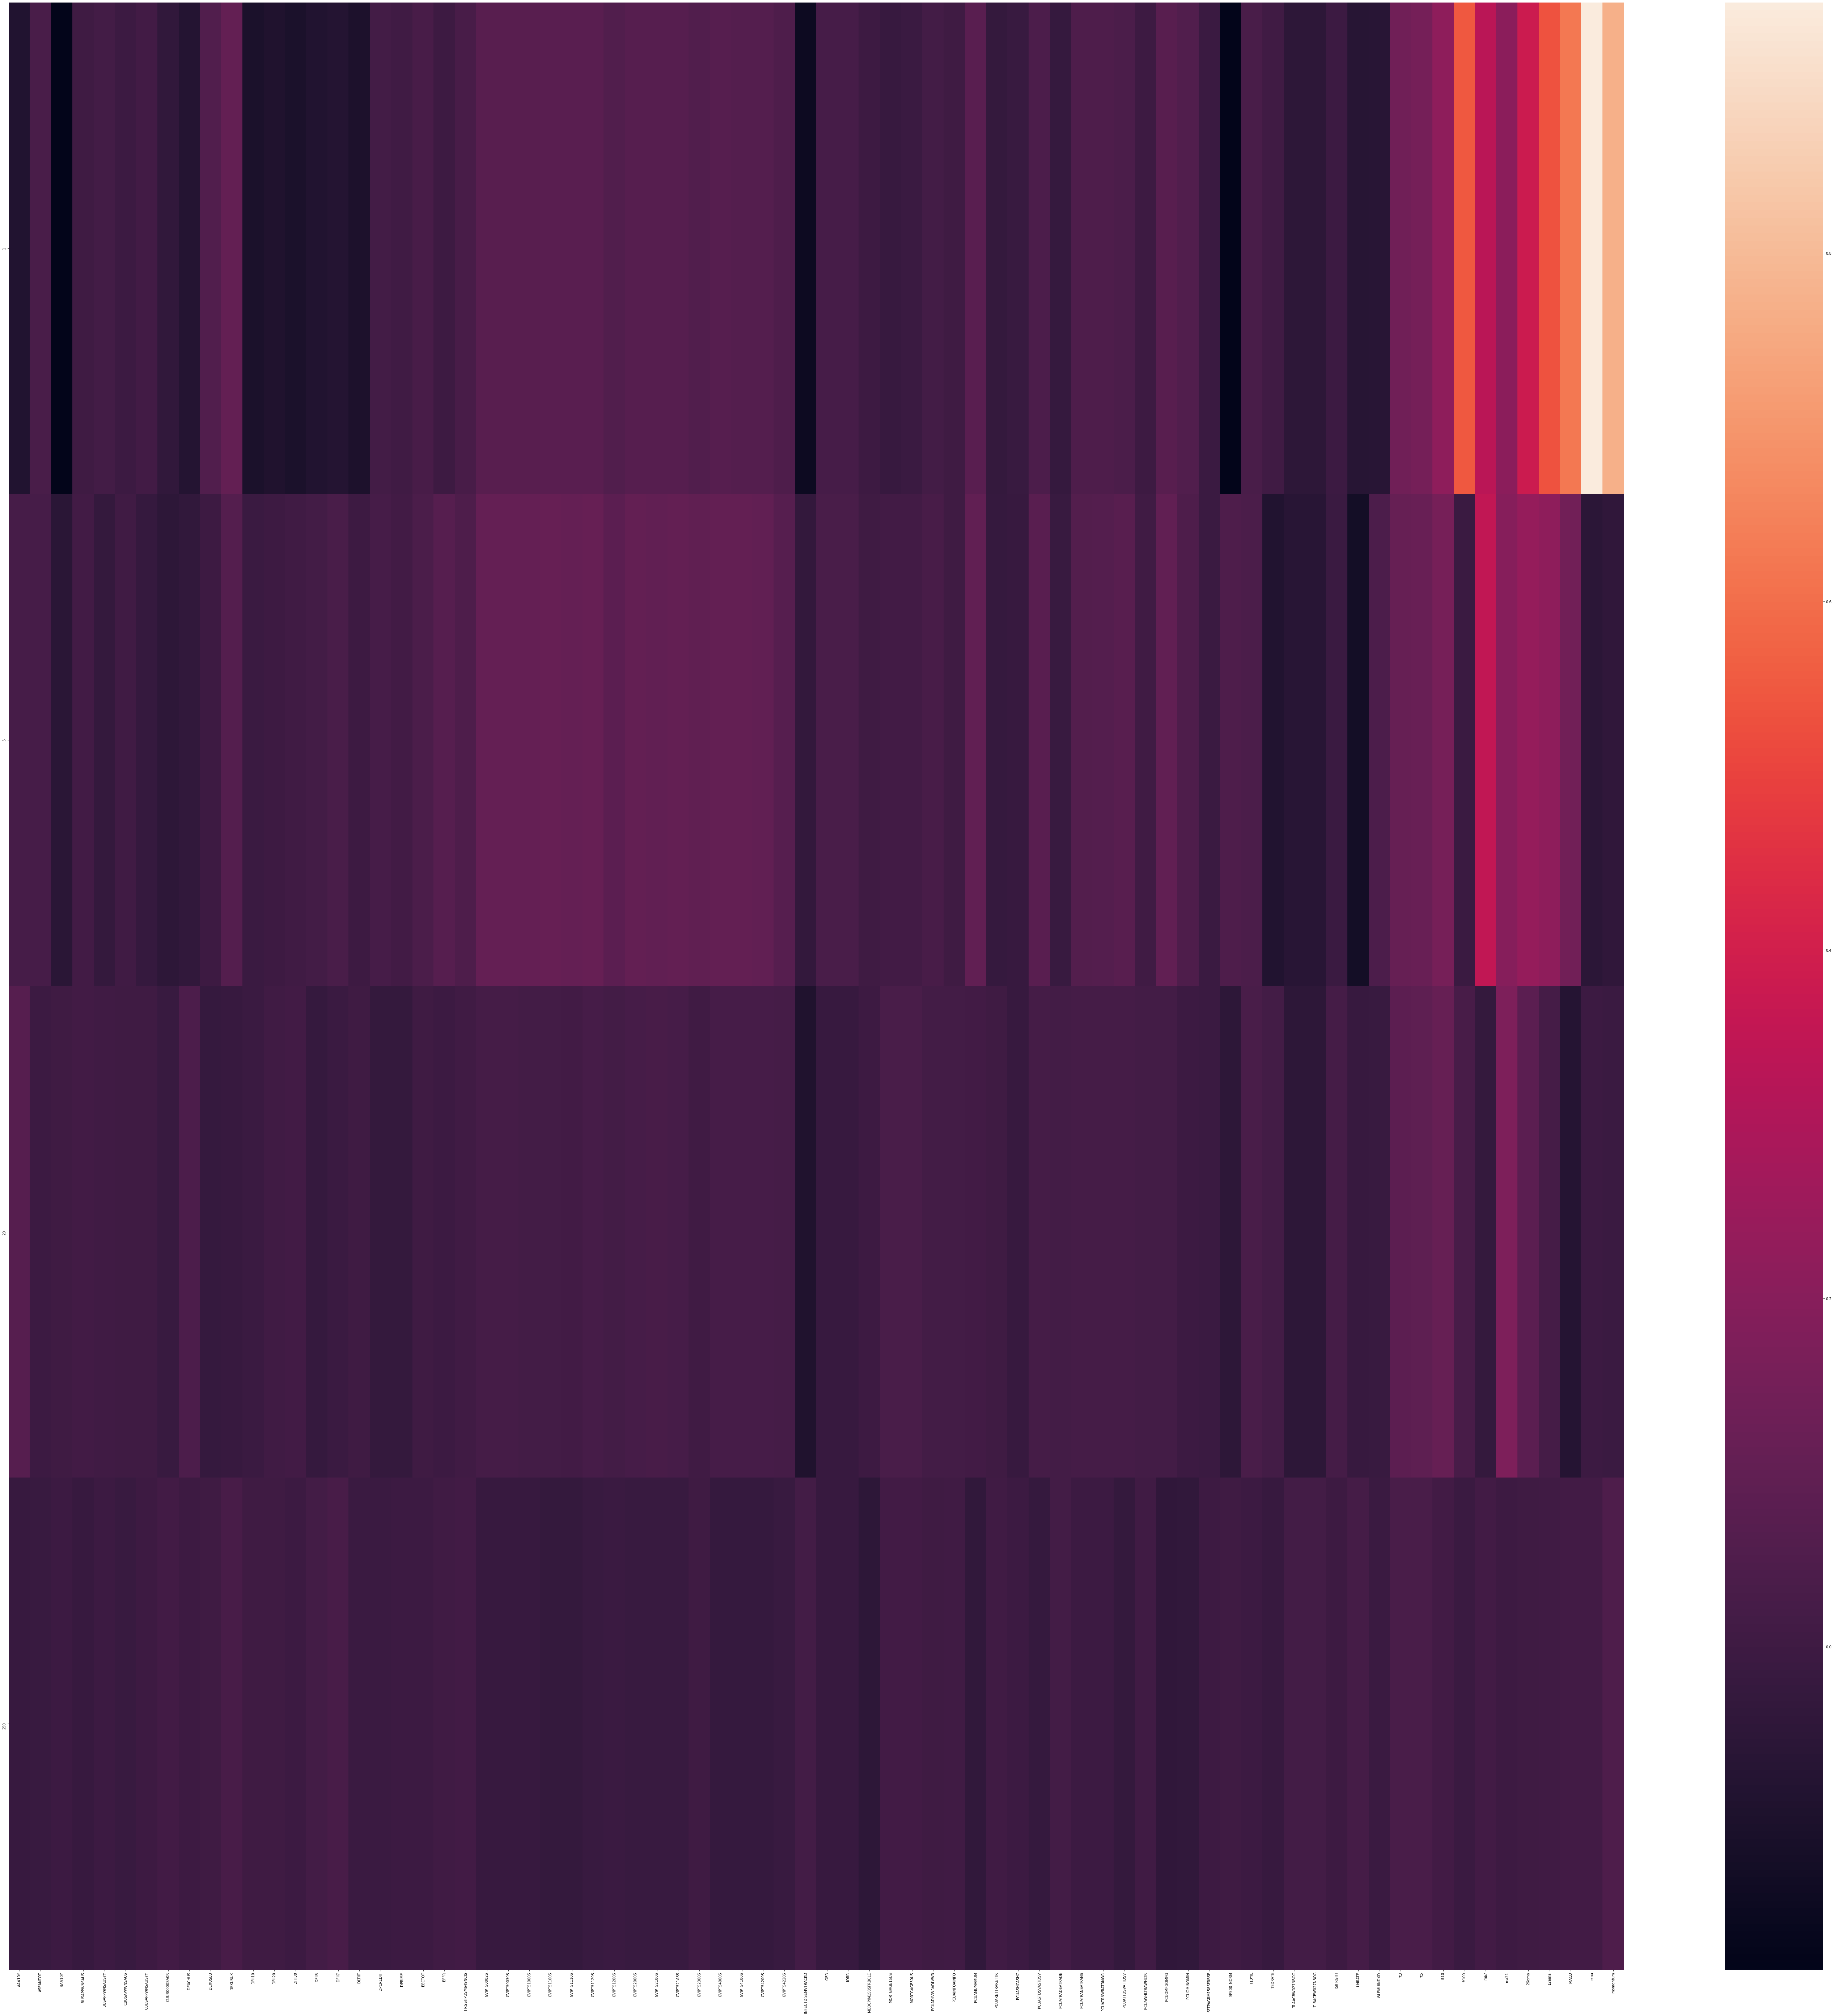

In [23]:
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(dtlcc,ax = ax)

In [24]:
diffs.columns[-10:]

Index(['ft5', 'ft10', 'ft100', 'ma7', 'ma21', '26ema', '12ema', 'MACD', 'ema',
       'momentum'],
      dtype='object')